# GRAPH

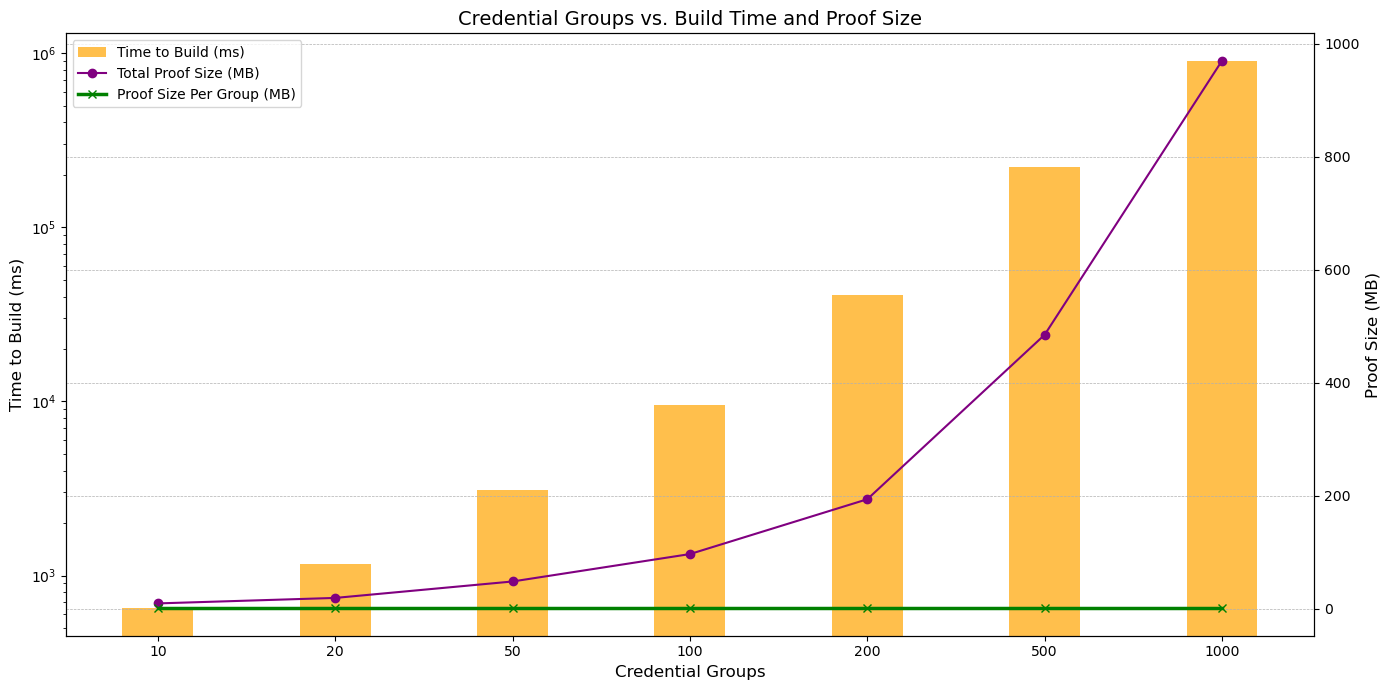

In [11]:
# Re-importing necessary libraries after state reset
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    "Credential Groups": [10, 20, 50, 100, 200, 500, 1000],
    "Time to Build (ms)": [
        647.74,
        1171.1,
        3097.8,
        9544.98,
        40956.6,
        221795.78,
        905295.07,
    ],
    "Total Proof Size (MB)": [9.7, 19.4, 48.5, 97, 194, 485, 969.9],
    "Proof Size Per Group (MB)": [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.9699],
}

# Extract data
groups = data["Credential Groups"]
time_to_build = data["Time to Build (ms)"]
total_proof_size = data["Total Proof Size (MB)"]
proof_size_per_group = data["Proof Size Per Group (MB)"]

# Updated plotting with line colors changed to purple and orange
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart with spacing
bar_width = 0.4  # Adjust width of bars
bar_positions = np.arange(len(groups))  # Evenly spaced positions
bars = ax1.bar(
    bar_positions,
    time_to_build,
    width=bar_width,
    color="orange",
    alpha=0.7,
    label="Time to Build (ms)",
)

# Customizing the x-axis
ax1.set_xlabel("Credential Groups", fontsize=12)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(groups)
ax1.set_ylabel("Time to Build (ms)", fontsize=12)
ax1.set_yscale("log")
ax1.tick_params(axis="y")

# Secondary y-axis for Total Proof Size and Proof Size Per Group
ax2 = ax1.twinx()
ax2.plot(
    bar_positions,
    total_proof_size,
    color="purple",
    marker="o",
    label="Total Proof Size (MB)",
)
ax2.plot(
    bar_positions,
    proof_size_per_group,
    color="green",
    marker="x",
    linewidth=2.5,
    label="Proof Size Per Group (MB)",
)

# Y-axis label for the second axis
ax2.set_ylabel("Proof Size (MB)", fontsize=12)
ax2.tick_params(axis="y")

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

# Title and grid
plt.title("Credential Groups vs. Build Time and Proof Size", fontsize=14)
plt.grid(axis="y", which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.savefig("./images/chart.png")
# plt.show()

# BUILD

In [12]:
import graphviz
from IPython.display import display, Image, clear_output


def generate_flowchart():
    dot = graphviz.Digraph()
    dot.attr(rankdir="TB", nodesep="0.02", ranksep="0.02")

    dot.node("S", "Start", shape="oval", style="filled", fillcolor="lightgreen")
    dot.node(
        "A",
        "Has permission.pdf && credential groups?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "B", "Is index ≤ 2?", shape="diamond", style="filled", fillcolor="lightblue"
    )
    dot.node(
        "C",
        "Is description formatted?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "D",
        "Read permission.pdf",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "E",
        "Is permission valid?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "F",
        "Is user confirmed?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "G",
        "Extract issuer information && grantedAddress",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "H",
        "Run Setup(PP, Creds)",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "I",
        "Generate proofs P",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "J", "Write VCDR", shape="rectangle", style="filled", fillcolor="lightyellow"
    )
    dot.node(
        "K", "Write SVCD", shape="rectangle", style="filled", fillcolor="lightyellow"
    )
    dot.node("E1", "End", shape="oval", style="filled", fillcolor="lightcoral")

    dot.edge("S", "A")
    dot.edge("A", "B", label="Yes")
    dot.edge("A", "E1", label="No")
    dot.edge("B", "C", label="Yes")
    dot.edge("B", "E1", label="No")
    dot.edge("C", "D", label="Yes")
    dot.edge("C", "E1", label="No")
    dot.edge("D", "E")
    dot.edge("E", "G", label="Yes")
    dot.edge("E", "F", label="No")
    dot.edge("F", "G", label="Yes")
    dot.edge("F", "E1", label="No")
    dot.edge("G", "H")
    dot.edge("H", "I")
    dot.edge("I", "J")
    dot.edge("J", "K")
    dot.edge("K", "E1")

    return dot


def render_flowchart():
    dot = generate_flowchart()
    dot.render("./images/build", format="png", cleanup=True)

    clear_output(wait=True)
    # display(Image(filename="./images/build.png"))


# Run this in a Jupyter cell to update the flowchart interactively
render_flowchart()

# DEPLOY

In [13]:
import graphviz
from IPython.display import display, Image, clear_output


def generate_flowchart():
    dot = graphviz.Digraph()
    dot.attr(rankdir="TB", nodesep="0.02", ranksep="0.02")

    dot.node("S", "Start", shape="oval", style="filled", fillcolor="lightgreen")
    dot.node(
        "A",
        "Has VCDR?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "B",
        "Read VCDR",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "C", "Is last action BUILT?", shape="diamond", style="filled", fillcolor="lightblue"
    )
    dot.node(
        "D",
        "Is user confirmed?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "E",
        "Launch local server",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "F",
        "Is wallet connected?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "G",
        "Is connected wallet address granted?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "H",
        "Deploy smart contract",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "I",
        "Is receipt generated?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "J",
        "Append receipt to VCDRe",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node("E1", "End", shape="oval", style="filled", fillcolor="lightcoral")

    dot.edge("S", "A")
    dot.edge("A", "B", label="Yes")
    dot.edge("A", "E1", label="No")
    dot.edge("B", "C", label="Yes")
    dot.edge("C", "D", label="Yes")
    dot.edge("C", "E", label="No")
    dot.edge("D", "E", label="Yes")
    dot.edge("D", "E1", label="No")
    dot.edge("E", "F")
    dot.edge("F", "G", label="Yes")
    dot.edge("F", "E1", label="No")
    dot.edge("G", "H", label="Yes")
    dot.edge("G", "E1", label="No")
    dot.edge("H", "I")
    dot.edge("I", "J", label="Yes")
    dot.edge("I", "E1", label="No")
    dot.edge("J", "E1")

    return dot


def render_flowchart():
    dot = generate_flowchart()
    dot.render("./images/deploy", format="png", cleanup=True)

    clear_output(wait=True)
    # display(Image(filename="./images/deploy.png"))


# Run this in a Jupyter cell to update the flowchart interactively
render_flowchart()

# EMBED

In [14]:
import graphviz
from IPython.display import display, Image, clear_output


def generate_flowchart():
    dot = graphviz.Digraph()
    dot.attr(rankdir="TB", nodesep="0.02", ranksep="0.02")

    dot.node("S", "Start", shape="oval", style="filled", fillcolor="lightgreen")
    dot.node(
        "A",
        "Has VCDRe && SVCD && permission.pdf && credential groups?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "B",
        "Read permission.pdf",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "C",
        "Is permission valid?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "D",
        "Is user confirmed?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "E",
        "Extract issuer information && grantedAddress",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )

    dot.node(
        "F",
        "Read VCDRe",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "G",
        "Has deployment receipt?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "H",
        "Is deployment valid?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "I",
        "Read SCVD",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "J",
        "Embed proofs and zip credential groups",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "K",
        "Is cleanup toggled?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "L",
        "Delete VCDRe && SVCD",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node("E1", "End", shape="oval", style="filled", fillcolor="lightcoral")

    dot.edge("S", "A")
    dot.edge("A", "B", label="Yes")
    dot.edge("A", "E1", label="No")
    dot.edge("B", "C", label="Yes")
    dot.edge("C", "D", label="Yes")
    dot.edge("C", "E1", label="No")
    dot.edge("D", "E", label="Yes")
    dot.edge("D", "E1", label="No")
    dot.edge("E", "F")
    dot.edge("F", "G", label="Yes")
    dot.edge("G", "H", label="Yes")
    dot.edge("G", "E1", label="No")
    dot.edge("H", "I")
    dot.edge("H", "E1", label="No")
    dot.edge("I", "J")
    dot.edge("J", "K")
    dot.edge("K", "L", label="Yes")
    dot.edge("K", "E1", label="No")
    dot.edge("L", "E1")

    return dot


def render_flowchart():
    dot = generate_flowchart()
    dot.render("./images/embed", format="png", cleanup=True)

    clear_output(wait=True)
    # display(Image(filename="./images/embed.png"))


# Run this in a Jupyter cell to update the flowchart interactively
render_flowchart()

# VERIFY

In [15]:
import graphviz
from IPython.display import display, Image, clear_output


def generate_flowchart():
    dot = graphviz.Digraph()
    dot.attr(rankdir="TB", nodesep="0.02", ranksep="0.02")

    dot.node("S", "Start", shape="oval", style="filled", fillcolor="lightgreen")
    dot.node(
        "A",
        "Extract proof && permission.pdf && original attachments",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "B",
        "Has permission.pdf && original attachments?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "C",
        "Extract proof (include hash original attachments)",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )   
    dot.node(
        "D",
        "Has enough components in the group?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "E",
        "Retrieve smart contract instance",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "F",
        "Is credential group revoked?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "G",
        "Show permission information",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "H",
        "Is permission valid?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "I",
        "Is user confirmed?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "J",
        "Show contract information",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "K",
        "Is information valid?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "L",
        "Show proof information",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node(
        "M",
        "Is proof valid?",
        shape="diamond",
        style="filled",
        fillcolor="lightblue",
    )
    dot.node(
        "N",
        "Show all components",
        shape="rectangle",
        style="filled",
        fillcolor="lightyellow",
    )
    dot.node("E1", "End", shape="oval", style="filled", fillcolor="lightcoral")

    dot.edge("S", "A")
    dot.edge("A", "B")
    dot.edge("B", "C", label="Yes")
    dot.edge("B", "E1", label="No")
    dot.edge("C", "D")
    dot.edge("D", "E", label="Yes")
    dot.edge("D", "E1", label="No")
    dot.edge("E", "F")
    dot.edge("F", "E1", label="Yes")
    dot.edge("F", "G", label="No")
    dot.edge("G", "H")
    dot.edge("H", "J", label="Yes")
    dot.edge("H", "I", label="No")
    dot.edge("I", "J", label="Yes")
    dot.edge("I", "E1", label="No")
    dot.edge("J", "K")
    dot.edge("K", "L", label="Yes")
    dot.edge("K", "I", label="No")
    dot.edge("I", "L", label="Yes")
    dot.edge("L", "M")
    dot.edge("M", "N", label="Yes")
    dot.edge("M", "E1", label="No")
    dot.edge("N", "E1")
    return dot


def render_flowchart():
    dot = generate_flowchart()
    dot.render("./images/verify", format="png", cleanup=True)

    clear_output(wait=True)
    # display(Image(filename="./images/verify.png"))


# Run this in a Jupyter cell to update the flowchart interactively
render_flowchart()